# Logistic Regression

## Financial Sentiment Analysis

Le but de ce projet est de **prédire le sentiment (positif/neutre/négatif) de textes à caractère financier**.

Pour plus de précision sur les data, voir le lien suivant:<br>
https://www.kaggle.com/datasets/sbhatti/financial-sentiment-analysis

## Exercice


### Load Data
1. Loadez et examinez les data.<br>
   ```
   df = pd.read_csv("./data/FinancialSentiment.csv")
   ```


### Data Analysis
2. Faites l'histogramme de votre variable réponse, pour savoir si on a affaire à un problème équilibré (balanced) ou non.


### Model
3. "Splitez" vos data en un **train set** et un **test set**.<br>
    https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
    

4. Utilisez la méthode appelée **TF-IDF** pour transformer vos data textuelles en vecteurs. Documentez-vous pour comprendre cette méthode.<br>
    https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html#sklearn.feature_extraction.text.TfidfTransformer
    

5. Fittez une **régression logistique** sur vos data.<br>
    https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression<br>
    Calculer le **rapport de classification (classification report)** relatif à vos prédictions.<br>
    https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report


6. Fittez deux autres modèles sur vos data appelés **support vector machine classifier (SVC)** et **naive Bayes classifier (NB)**:<br>
    https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC<br>
    https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html<br>
    Calculer le **rapport de classification (classification report)** relatif à vos prédictions.<br>


## Librairies

In [1]:
import pandas as pd
import numpy as np

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt

## Load Data

In [2]:
df = pd.read_csv("./data/FinancialSentiment.csv")

In [3]:
df.head()

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


In [4]:
df.shape

(5842, 2)

In [5]:
df.iloc[2]["Sentence"]

"For the last quarter of 2010 , Componenta 's net sales doubled to EUR131m from EUR76m for the same period a year earlier , while it moved to a zero pre-tax profit from a pre-tax loss of EUR7m ."

## Data Analysis

In [6]:
df.Sentiment.value_counts()

neutral     3130
positive    1852
negative     860
Name: Sentiment, dtype: int64

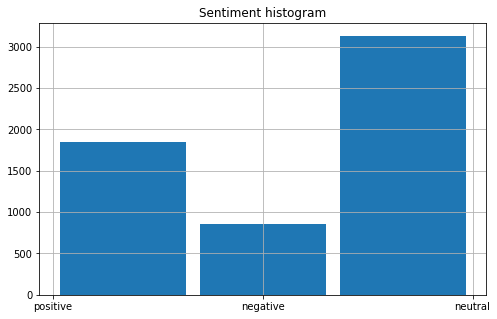

In [7]:
plt.figure(figsize=(8, 5))

df.Sentiment.hist(bins=3, rwidth=0.9)

plt.title('Sentiment histogram')
plt.show()

## Models

### LR

In [8]:
X_train, X_test, y_train, y_test = train_test_split(df.Sentence, df.Sentiment, 
                                                    test_size=0.2, random_state=42)

In [9]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4673,), (1169,), (4673,), (1169,))

In [10]:
pipeline = Pipeline([('tfidf', TfidfVectorizer()), 
                     ('model', LogisticRegression())])

In [11]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('model', LogisticRegression())])

In [12]:
y_pred = pipeline.predict(X_test)

In [13]:
y_pred

array(['neutral', 'positive', 'negative', ..., 'positive', 'neutral',
       'neutral'], dtype=object)

In [14]:
print(classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

    negative      0.490     0.143     0.221       175
     neutral      0.708     0.899     0.792       622
    positive      0.766     0.677     0.719       372

    accuracy                          0.715      1169
   macro avg      0.655     0.573     0.578      1169
weighted avg      0.694     0.715     0.684      1169



### LR, SVC and NB

In [15]:
models_d = {"LR" : LogisticRegression(), "SVC" : SVC(), "NB" : MultinomialNB()}

for name, model in models_d.items():
    
    pipeline = Pipeline([('tfidf', TfidfVectorizer()), ('model', model)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    print(f"*** {name} ***")
    print(classification_report(y_test, y_pred, digits=3))

*** LR ***
              precision    recall  f1-score   support

    negative      0.490     0.143     0.221       175
     neutral      0.708     0.899     0.792       622
    positive      0.766     0.677     0.719       372

    accuracy                          0.715      1169
   macro avg      0.655     0.573     0.578      1169
weighted avg      0.694     0.715     0.684      1169

*** SVC ***
              precision    recall  f1-score   support

    negative      0.283     0.086     0.132       175
     neutral      0.688     0.902     0.781       622
    positive      0.784     0.634     0.701       372

    accuracy                          0.695      1169
   macro avg      0.585     0.541     0.538      1169
weighted avg      0.658     0.695     0.658      1169

*** NB ***
              precision    recall  f1-score   support

    negative      0.900     0.051     0.097       175
     neutral      0.634     0.981     0.770       622
    positive      0.716     0.379     0.4

## Hyperparameter Tuning

In [16]:
pipeline = Pipeline([('tfidf', TfidfVectorizer()), 
                     ('model', SVC())])

In [17]:
parameters = {"tfidf__stop_words" : [None, "english"], 
              "tfidf__ngram_range" : [(1, 1), (1,2)], 
              #"tfidf__max_df" : [1.0, 0.9, 0.8], 
              #"tfidf__min_df" : [1.0, 0.9, 0.8],
              "model__kernel" : ["poly", "rbf"],
              #"model__degree" : [2, 3, 4],
              "model__C" : np.logspace(-2, 2, 5)}

In [18]:
pipeline_gs = GridSearchCV(pipeline, parameters, verbose=2)

In [19]:
pipeline_gs.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] END model__C=0.01, model__kernel=poly, tfidf__ngram_range=(1, 1), tfidf__stop_words=None; total time=   3.1s
[CV] END model__C=0.01, model__kernel=poly, tfidf__ngram_range=(1, 1), tfidf__stop_words=None; total time=   3.2s
[CV] END model__C=0.01, model__kernel=poly, tfidf__ngram_range=(1, 1), tfidf__stop_words=None; total time=   3.2s
[CV] END model__C=0.01, model__kernel=poly, tfidf__ngram_range=(1, 1), tfidf__stop_words=None; total time=   3.2s
[CV] END model__C=0.01, model__kernel=poly, tfidf__ngram_range=(1, 1), tfidf__stop_words=None; total time=   3.2s
[CV] END model__C=0.01, model__kernel=poly, tfidf__ngram_range=(1, 1), tfidf__stop_words=english; total time=   2.2s
[CV] END model__C=0.01, model__kernel=poly, tfidf__ngram_range=(1, 1), tfidf__stop_words=english; total time=   2.0s
[CV] END model__C=0.01, model__kernel=poly, tfidf__ngram_range=(1, 1), tfidf__stop_words=english; total time=   2.1s
[CV] END model__C

[CV] END model__C=0.1, model__kernel=rbf, tfidf__ngram_range=(1, 2), tfidf__stop_words=None; total time=   4.2s
[CV] END model__C=0.1, model__kernel=rbf, tfidf__ngram_range=(1, 2), tfidf__stop_words=None; total time=   4.2s
[CV] END model__C=0.1, model__kernel=rbf, tfidf__ngram_range=(1, 2), tfidf__stop_words=None; total time=   4.2s
[CV] END model__C=0.1, model__kernel=rbf, tfidf__ngram_range=(1, 2), tfidf__stop_words=None; total time=   4.2s
[CV] END model__C=0.1, model__kernel=rbf, tfidf__ngram_range=(1, 2), tfidf__stop_words=english; total time=   3.1s
[CV] END model__C=0.1, model__kernel=rbf, tfidf__ngram_range=(1, 2), tfidf__stop_words=english; total time=   3.1s
[CV] END model__C=0.1, model__kernel=rbf, tfidf__ngram_range=(1, 2), tfidf__stop_words=english; total time=   2.8s
[CV] END model__C=0.1, model__kernel=rbf, tfidf__ngram_range=(1, 2), tfidf__stop_words=english; total time=   2.9s
[CV] END model__C=0.1, model__kernel=rbf, tfidf__ngram_range=(1, 2), tfidf__stop_words=engli

[CV] END model__C=10.0, model__kernel=rbf, tfidf__ngram_range=(1, 1), tfidf__stop_words=None; total time=   3.1s
[CV] END model__C=10.0, model__kernel=rbf, tfidf__ngram_range=(1, 1), tfidf__stop_words=None; total time=   3.0s
[CV] END model__C=10.0, model__kernel=rbf, tfidf__ngram_range=(1, 1), tfidf__stop_words=english; total time=   2.2s
[CV] END model__C=10.0, model__kernel=rbf, tfidf__ngram_range=(1, 1), tfidf__stop_words=english; total time=   2.1s
[CV] END model__C=10.0, model__kernel=rbf, tfidf__ngram_range=(1, 1), tfidf__stop_words=english; total time=   2.3s
[CV] END model__C=10.0, model__kernel=rbf, tfidf__ngram_range=(1, 1), tfidf__stop_words=english; total time=   2.2s
[CV] END model__C=10.0, model__kernel=rbf, tfidf__ngram_range=(1, 1), tfidf__stop_words=english; total time=   2.1s
[CV] END model__C=10.0, model__kernel=rbf, tfidf__ngram_range=(1, 2), tfidf__stop_words=None; total time=   4.3s
[CV] END model__C=10.0, model__kernel=rbf, tfidf__ngram_range=(1, 2), tfidf__stop

GridSearchCV(estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('model', SVC())]),
             param_grid={'model__C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'model__kernel': ['poly', 'rbf'],
                         'tfidf__ngram_range': [(1, 1), (1, 2)],
                         'tfidf__stop_words': [None, 'english']},
             verbose=2)

In [20]:
# pipeline_gs.best_params_

In [21]:
y_pred = pipeline_gs.predict(X_test)

In [22]:
print(classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

    negative      0.283     0.086     0.132       175
     neutral      0.688     0.902     0.781       622
    positive      0.784     0.634     0.701       372

    accuracy                          0.695      1169
   macro avg      0.585     0.541     0.538      1169
weighted avg      0.658     0.695     0.658      1169

